In [1]:
import requests
import io 
import config
import json
from yelp.client import Client
import pandas as pd
from geopandas import GeoDataFrame

wfyelp_file='wholefoods_yelp.csv'
wflocations_file='wholefoods_locations.csv'

MY_API_KEY = config.APIKEY #  Replace this with your real API key
client = Client(MY_API_KEY)

In [2]:
PATH_wf = './original_wf_data1.csv'
PATH_xl = '/Users/caroling/Desktop/capstone-yelp/original_wf_data1.xlsx'
PATH_txt = './wf_data.csv'
dfwf = pd.read_csv(PATH_txt, header='infer')  

#f = open(PATH_wf,'r')
#data = f.read()
#df = pd.read_excel(PATH_xl, sheet_name='sheet1')
#with open(PATH_wf, "rt", encoding="utf8") as f:
#    print(f)
dfwf

FileNotFoundError: [Errno 2] No such file or directory: './wf_data.csv'

In [ ]:
"""for ind in range(len(dfwf)):
    print(ind)
    url = 'https://api.yelp.com/v3/businesses/search'
    header = {'Authorization':'Bearer ' + config.APIKEY}
    url_params = {'term':  'Whole/Foods',
             'longitude': dfwf['Longitude'][ind],
             'lattitude': dfwf['Latitude'][ind],
             'limit':2}
    term='Whole/Foods'
    longitude=dfwf['Longitude'][ind]
    latitude=dfwf['Latitude'][ind]

    url = 'https://api.yelp.com/v3/businesses/search?term={}&longitude={}&latitude={}&limit=1&apikey={}'.format(term, longitude, latitude, config.APIKEY)
    #print(url)
    response = requests.get(url, headers = header)  #dictionary of parameters


    data = response.json()

    df = pd.DataFrame.from_dict(response.json()['businesses'])
    if ind == 0:
        dfall=df
    else:
        dfall = dfall.append(df, ignore_index=True)
dfall.to_csv('wholefoods_yelp.csv')
dfwf.to_csv('wholefoods_locations.csv')




with open(wfyelp_file, "wb") as dill_file:
    dill.dump(dfall, dill_file)
    
with open(wflocations_file, "wb") as dill_file:
    dill.dump(dfwf, dill_file)
    
dfall.to_csv('wholefoods_yelp.csv', index=False)
dfwf.to_csv('wholefoods_locations.csv', index=False)"""


In [ ]:
import dill



with open(wfyelp_file, "rb") as dill_file:
    dfall= dill.load(dill_file)
    
with open(wflocations_file, "rb") as dill_file:
    dfwf = dill.load(dill_file)
    
import ast
import json

dfall_zips = []
dfall_state = []
dfall_city = []
for ind, location in enumerate(dfall['location'][:]):
    #print(location)
    if location != ',':
        
        dfall_locexplode =(ast.literal_eval(location))
        dfall_state.append(dfall_locexplode['state'])
        dfall_city.append(dfall_locexplode['city'])
        dfall_zips.append(dfall_locexplode['zip_code'])
    else:
   
        dfall_zips.append('0')
        dfall_state.append('0')
        dfall_city.append('0')
        
dfall['city'] = dfall_city     
dfall['state'] = dfall_state    
dfall['zip_code'] = dfall_zips
dfall.head()

In [ ]:
wf = pd.DataFrame()
ca_df=pd.DataFrame()


longlist, latlist, zipslist, citylist, statelist = [], [], [], [],[]
calonglist, calatlist,calist_zip, ca_citylist, ca_statelist = [], [], [], [],[]
ca_alias, ca_rating,ca_reviewcount = [], [], []
for ind in range(len(dfwf)):
    
    zipslist.append(dfall['zip_code'][ind])
    citylist.append(dfall['city'][ind])
    statelist.append(dfall['state'][ind])
    longlist.append(dfwf['Longitude'][ind])
    latlist.append(dfwf['Latitude'][ind])
    
    #print(dfall['state'][ind])
    if dfall['state'][ind] == 'CA':
        
        calist_zip.append(dfall['zip_code'][ind])
        ca_citylist.append(dfall['city'][ind])
        ca_statelist.append(dfall['state'][ind])
        calonglist.append(dfwf['Longitude'][ind])
        calatlist.append(dfwf['Latitude'][ind])
        ca_alias.append(dfall['alias'][ind])
        ca_rating.append(dfall['rating'][ind])
        ca_reviewcount.append(dfall['review_count'][ind])
        
ca_df['name'] = ca_alias
ca_df['rating'] = ca_rating
ca_df['review_count'] = ca_reviewcount
ca_df['zipcode'] = calist_zip
ca_df['city'] = ca_citylist
ca_df['state'] = ca_statelist

ca_df['longitude'] = calonglist
ca_df['latitude'] = calatlist
        
wf['name'] = dfall['alias'][:]
wf['rating'] = dfall['rating'][:]
wf['review_count'] = dfall['review_count'][:]    
wf['zipcode'] = zipslist
wf['city'] = citylist
wf['state'] = statelist
wf['longitude'] = longlist
wf['latitude'] = latlist


In [ ]:
#import matplotlib.pyplot as plt 
#plt.plot(wf.index, wf.review_count) 

ca_df.head()

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from uszipcode import SearchEngine

states = gpd.read_file('./usa-states-census-2014.shp')
type(states)
#states.plot(cmap='magma', figsize=(12, 12))



geometry = [Point(xy) for xy in zip(wf['longitude'], wf['latitude'])]
gdf = GeoDataFrame(wf, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# We restrict to South America.
#ax = world[world.continent == 'North America'].plot(
#    color='white', edgecolor='black')

#gdf.plot(ax=ax, marker='o', color='red', markersize=15);


# Read in shapefile and examine data
#contiguous_usa = gpd.read_file('./cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
df_zipcodes = gpd.read_file('./cb_2018_us_zcta510_500k/cb_2018_us_zcta510_500k.shp')
df_zipcodes.head()
#dfu = contiguous_usa[~contiguous_usa.STATE_ABBR.isin(['AK','HI', 'AA', 'AE','AP','PR','RI','VI'])]
df_zipcodes.rename(columns={'ZCTA5CE10':'zipcode'}, inplace=True)
df_zipcodes['zip_code'] = df_zipcodes['zipcode'].astype('str')
df_zipcodes['zip_code'] = df_zipcodes['zip_code'].str.pad(5, 'left', '0')
df_zipcodes['zip_code'] = df_zipcodes['zip_code'].str.slice(0,3)
df_zipcodes['zip_code'] = df_zipcodes['zip_code'].str.pad(5, 'right', 'x')
search = SearchEngine(simple_zipcode=True)
df_zipcodes['state'] = df_zipcodes.apply(lambda row: search.by_zipcode(row.zipcode).state, axis=1)
df_zipcodes['county'] = df_zipcodes.apply(lambda row: search.by_zipcode(row.zipcode).county, axis=1)


/opt/anaconda3/envs/geo-env/lib/python3.9/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

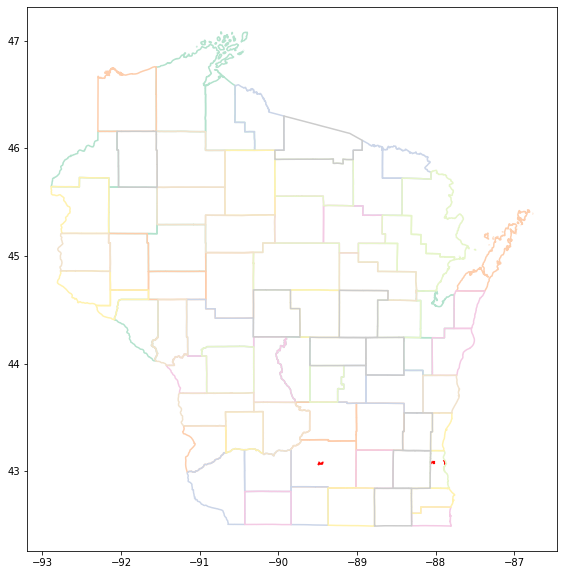

In [57]:
counties = gpd.read_file('./geopandas-tutorial/data/USA_Counties/USA_Counties.shp')
counties = counties[~counties.STATE_NAME.isin(['Alaska','Hawaii', 'AA', 'AE','AP','Puerto Rico','RI','VI'])]

abbrvs0 = 46
abbrvs1 = [ 'Alabama', 'Arizona', 'Arkansas','California',  'Colorado', 'Connecticut',
          'Delaware', 'Florida', 'Georgia', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
          'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
          'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
          'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina',
          'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
          'South Carolina', 'South Dakota', 'Tennessee', 'Texas','Utah', 'Vermont', 'Virginia','Washington',
          'West Virginia', 'Wisconsin', 'Wyoming' ]
abbrvs2 = ['AL',  'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN',
          'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN','MS', 'MO', 'MT', 'NE',
          'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI',
          'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
cali = counties[counties.STATE_NAME.isin([abbrvs1[abbrvs0]])]

#counties.head()
fig, ax = plt.subplots(figsize=(10,10))
#counties.boundary.plot(cmap='Pastel2',ax=ax)
cali.boundary.plot(cmap='Pastel2',ax=ax)


df_redlines_maps = df_zipcodes.merge(wf[1:], on='zipcode', how='inner')
df_redlines_maps['geometry'] =df_redlines_maps['geometry_x']

df_redlines_maps = df_redlines_maps[df_redlines_maps.state.isin([abbrvs2[abbrvs0]])]
df_redlines_maps_mm = GeoDataFrame(df_redlines_maps)
df_redlines_maps_mm.plot(column='review_count', ax=ax, cax='review_count',color='red')

